In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import datetime
from sklearn.svm import SVC
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
# tylko dla tych co mają zainstalowaną paczkę jupyterthemes
# kto nie ma to niech zakomentuje, ponieważ będzie wywalać błąd
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

### sprawdzenie na naszej sieci

### Eksplracja danych  Projket DL

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

In [12]:
df = pd.read_csv('age_gender.csv')
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [14]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

Text(0.5, 1.0, 'gender')

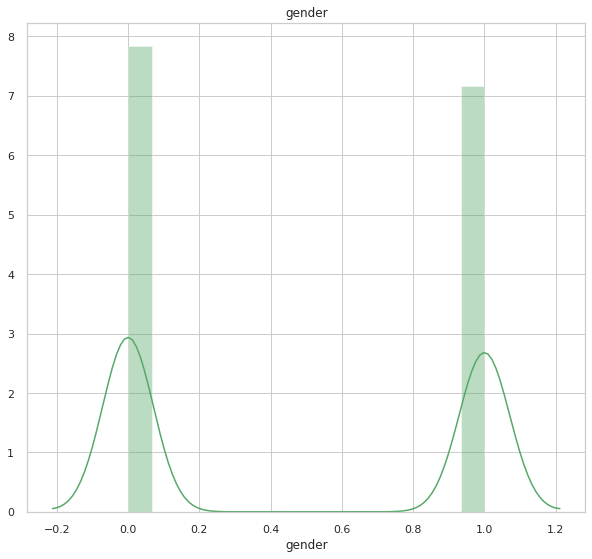

In [15]:
# sns.distplot(df['gender']);



sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(10, 9))
ax = sns.distplot(df['gender'], kde = True, color = 'g')
plt.title('gender')

Text(0.5, 1.0, 'wiek')

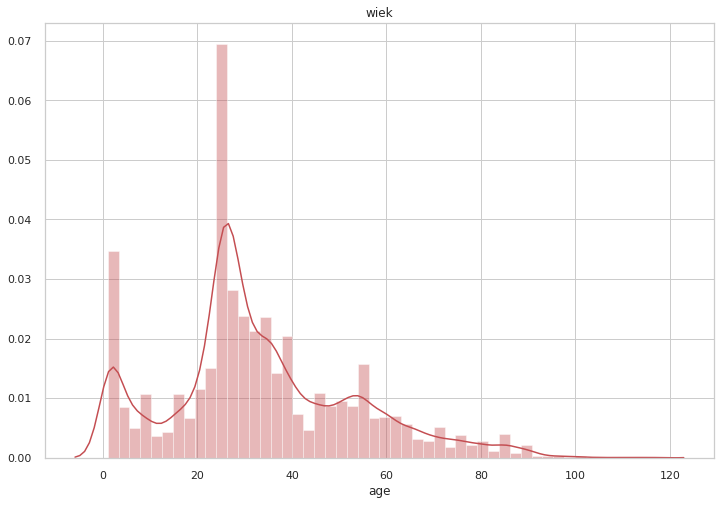

In [18]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(df['age'], kde = True, color = 'r' )
plt.title('wiek')

Text(0.5, 1.0, 'ethnicity')

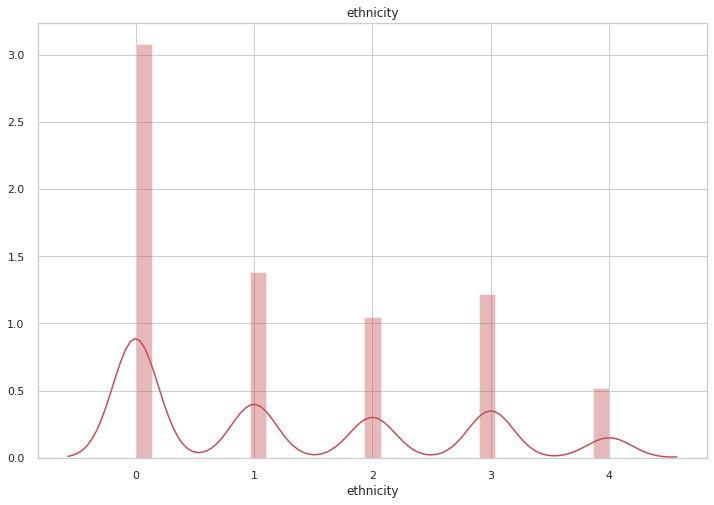

In [20]:


f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(df['ethnicity'], kde = True, color = 'r' )
plt.title('ethnicity')


In [21]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [22]:
df[df.duplicated() == True]

,age,ethnicity,gender,img_name,pixels


In [27]:
df_pixels = df.pixels.str.split(" ").tolist() 
df_pixels = pd.DataFrame(df_pixels, dtype=int)
df_images = df_pixels.values
df_images = df_images.astype(np.float)

print(df_images.shape)

(23705, 2304)


In [24]:
def show(img):
    show_image = img.reshape(48,48)
    
    plt.axis('off')
    plt.imshow(show_image, cmap='gray')

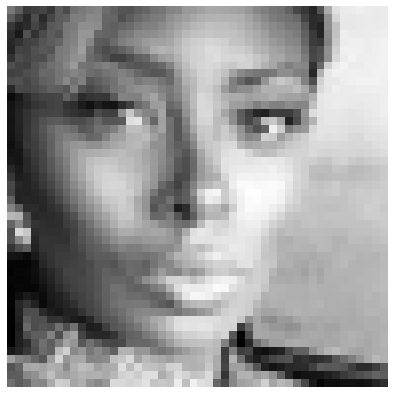

In [25]:


show(df_images[14856])


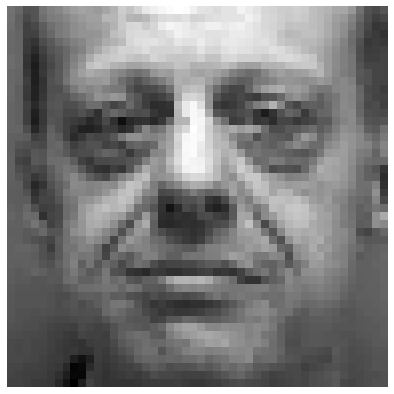

In [26]:
show(df_images[19856])


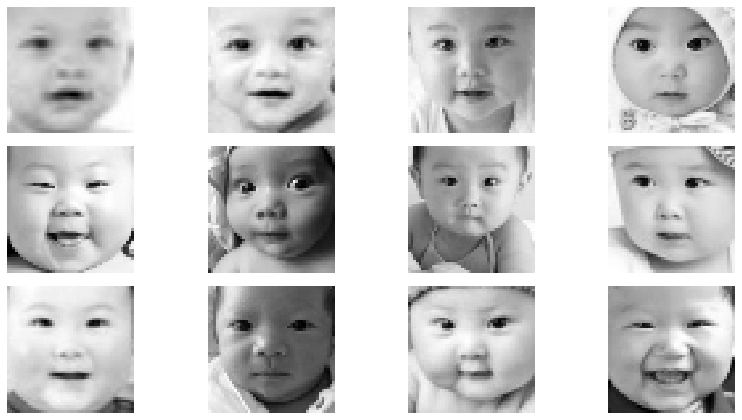

In [28]:


plt.figure(0, figsize=(12,6))
for i in range(1,13 ):
  plt.subplot(3, 4, i)
  plt.axis('off')

  image = df_images[i+i*2].reshape(48,48)
  plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

In [35]:
x = np.array(df['pixels'].tolist())
x = x.reshape(x.shape[0],48,48,1)
y = df['gender']

In [62]:
model = tf.keras.Sequential()
model.add(layer.InputLayer(input_shape=(48,48,1)))
model.add(layer.Conv2D(32, (3, 1), activation='relu', input_shape=(32, 32, 1)))
model.add(layer.BatchNormalization())
model.add(layer.MaxPooling2D((2, 2)))
model.add(layer.Conv2D(64, (3, 1), activation='relu'))
model.add(layer.MaxPooling2D((2, 2)))
model.add(layer.Flatten())
model.add(layer.Dense(64, activation='relu'))
model.add(layer.Dropout(rate=0.5))
model.add(layer.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

class stop_train(tf.keras.callbacks.Callback):
    def stop_traning(self, epoch, logs={}):
        if(logs.get('val_loss')<0.2800):
            print("\nOsiagnieto 0.2800 val_loss zaprzestano trening")
            self.model.stop_training = True
        
callback = stop_train()

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 46, 48, 32)        128       
_________________________________________________________________
batch_normalization_3 (Batch (None, 46, 48, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 24, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 24, 64)        6208      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 10, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 7680)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=64, callbacks=[callback])

Epoch 1/30
267/267 [==============================] - 115s 431ms/step - loss: 0.5398 - accuracy: 0.7342 - val_loss: 0.4585 - val_accuracy: 0.7818
Epoch 2/30
267/267 [==============================] - 136s 509ms/step - loss: 0.5153 - accuracy: 0.7477 - val_loss: 0.4760 - val_accuracy: 0.7586
Epoch 3/30
267/267 [==============================] - 129s 482ms/step - loss: 0.4957 - accuracy: 0.7597 - val_loss: 0.4598 - val_accuracy: 0.7860
Epoch 4/30
267/267 [==============================] - 130s 488ms/step - loss: 0.4705 - accuracy: 0.7745 - val_loss: 0.4465 - val_accuracy: 0.7949
Epoch 5/30
267/267 [==============================] - 135s 505ms/step - loss: 0.4505 - accuracy: 0.7878 - val_loss: 0.4229 - val_accuracy: 0.8118
Epoch 6/30
267/267 [==============================] - 130s 487ms/step - loss: 0.4256 - accuracy: 0.8000 - val_loss: 0.4088 - val_accuracy: 0.8113
Epoch 7/30
267/267 [==============================] - 187s 701ms/step - loss: 0.4193 - accuracy: 0.8056 - val_loss: 0.4074 -

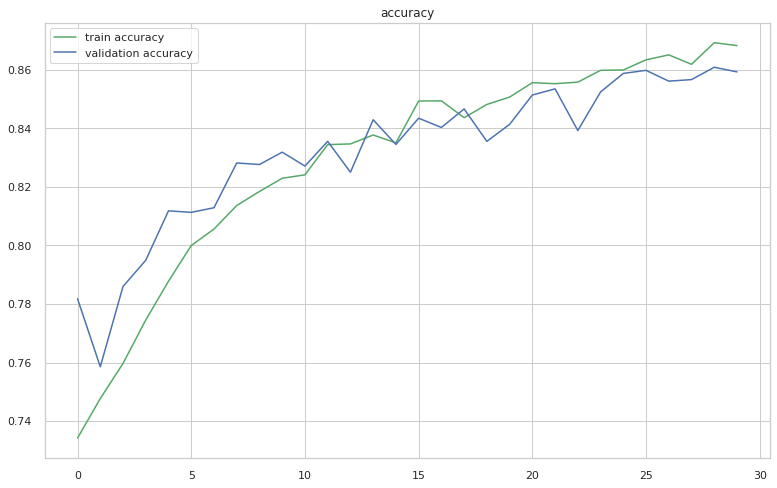

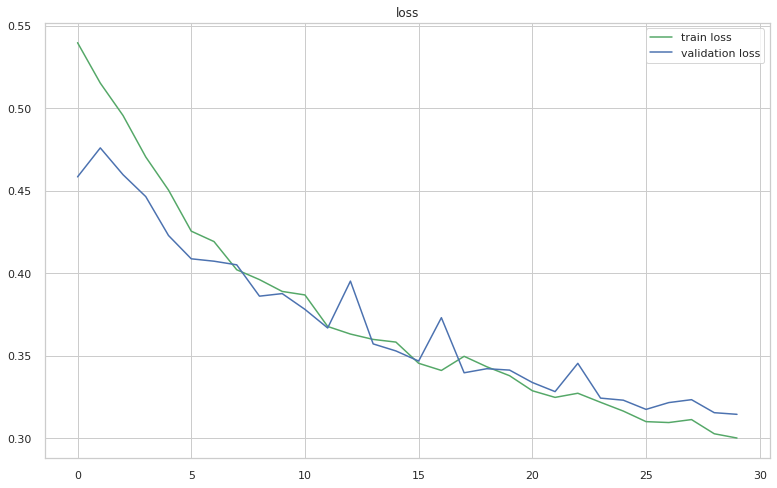

In [66]:
# sns.set(style='whitegrid')
# f, ax = plt.subplots(1,1, figsize=(10, 9))
# ax = sns.distplot(df['gender'], kde = True, color = 'g')
# plt.title('gender')

plt.figure(figsize=(13,8))
plt.title("accuracy")
plt.plot(history.history["accuracy"], color = 'g')
plt.plot(history.history["val_accuracy"], color = 'b')
plt.legend(["train accuracy", "validation accuracy"])
plt.show()
plt.figure(figsize=(13,8))
plt.title("loss")
plt.plot(history.history["loss"], color = 'g')
plt.plot(history.history["val_loss"], color = 'b')
plt.legend(["train loss", "validation loss"])
plt.show()




In [80]:

X_test = X_test.reshape(-1,48,48,1)
y_pred = model.predict(X_test)